# Goal

Get biweight center and scale for all of the groups in our Halpha Groups sample.

In [218]:
from astropy.io import fits
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.stats import biweight_scale,biweight_location,SigmaClip
import os
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [53]:
def get_biweight(z,nsigma=2):
    """pass in redshift of galaxies in the vicinity of a group"""
    from astropy.stats import sigma_clip
    #sigclip = SigmaClip(sigma=scale_cut,maxiters=10,cenfunc=biweight_location,stdfunc=biweight_scale)
    good_data = sigma_clip(z, sigma=nsigma, maxiters=10, stdfunc=biweight_scale,cenfunc=biweight_location)
    return good_data


In [48]:
# create a test dataset
realsigma = 350
realcenter = 2200
realZ = np.random.normal(loc=realcenter,scale=realsigma,size=100)
noiseZ = np.random.uniform(100,5000,size=100)
testZ = np.array(realZ.tolist()+noiseZ.tolist())
goodZ = get_biweight(testZ,nsigma=2)

(array([ 1.,  0.,  3., 10., 18., 17., 27., 18.,  5.,  1.]),
 array([ 778.02527322, 1026.93986084, 1275.85444846, 1524.76903607,
        1773.68362369, 2022.59821131, 2271.51279893, 2520.42738655,
        2769.34197417, 3018.25656179, 3267.17114941]),
 [<matplotlib.patches.Polygon at 0x7f62e264df10>])

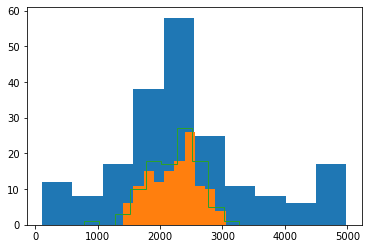

In [49]:

plt.hist(testZ)
plt.hist(goodZ[~goodZ.mask])
plt.hist(realZ,histtype='step')

In [50]:
# measure the location and scale from the clipped data
print(realcenter,biweight_location(goodZ[~goodZ.mask]))
print(realsigma,biweight_scale(goodZ[~goodZ.mask]))

2200 2240.646705623918
350 410.0149084896051


In [51]:
# measure the location and scale directly from the simulated data
print(realcenter,biweight_location(realZ))
print(realsigma,biweight_scale(realZ))

2200 2266.8135102028837
350 407.91177710697406


In [55]:
def get_biweight(z,nsigma=2):
    """
    PARAMS:
    z : redshift of galaxies in the vicinity of a group
    nsigma : sigma to use in sigma clipping
    
    RETURN:
    c : biweight center
    s : biweight scale
    masked_data : input array, as masked array, where mask=True indicated clipped data
    """
    from astropy.stats import sigma_clip
    #sigclip = SigmaClip(sigma=scale_cut,maxiters=10,cenfunc=biweight_location,stdfunc=biweight_scale)
    good_data = sigma_clip(z, sigma=nsigma, maxiters=10, stdfunc=biweight_scale,cenfunc=biweight_location)
    c = biweight_location[good_data[~good_data.mask]]
    s = biweight_scale[good_data[~good_data.mask]]
    return c,s, good_data


# Next Steps

* read in file with RA, DEC, and vr of groups
* read in NSA
* convert theta to Mpc at distance of group
* for each group, cut NSA within dv < 4000 and dr < 1 Mpc
* feed cut sample into biweight calculator

Can use 

`uat_all_galaxies_fov.py`

In [3]:
homedir = os.getenv("HOME")
os.chdir(homedir+'/research/HalphaGroups/catalogs/')

Abell1367:N=252,vr=6490+ 53- 55, sigma= 834+ 35- 40
Coma     :N=597,vr=7015+ 64- 53, sigma=1058+ 21- 31
HCG79    :N= 39,vr=4653+124-118, sigma= 565+ 50- 69
MKW8     :N=121,vr=8060+ 47- 39, sigma= 430+ 27- 30
MKW8s    :N=121,vr=8063+ 37- 28, sigma= 435+ 32- 39
[1856.1211  1709.5234  1919.1306  2261.8862  2160.7473  1663.9858
 1586.2472  1666.4989  1646.9381  1845.9213  2084.2874  1528.069
 2073.4072  1760.4309  1869.8551  1805.8497  1347.8772  2117.674
 1833.0732  2546.6147  1968.3044  2300.5195   920.58075 1697.6715
 1570.2769  1838.0806  2140.8096  1342.6549  1737.361   2360.2163
 1885.3856  1562.963   1245.9762  1819.6578  1948.2078  2153.7563
 1997.1216  1785.1515  1910.9999  2389.293   1703.4244  1721.5273
 1659.8483  1294.26    1257.6929  1874.2458  1942.5748  1654.8591
 1537.6439  2076.6506  1924.0149  1060.7882  1725.3646  1742.3323
 1991.4608  1683.2485  1566.2654  1815.3639  1649.0701  1884.2725
 1764.8446  1947.8112  1889.2941  1859.155   1907.3999  1464.3737
 1878.3093  1674

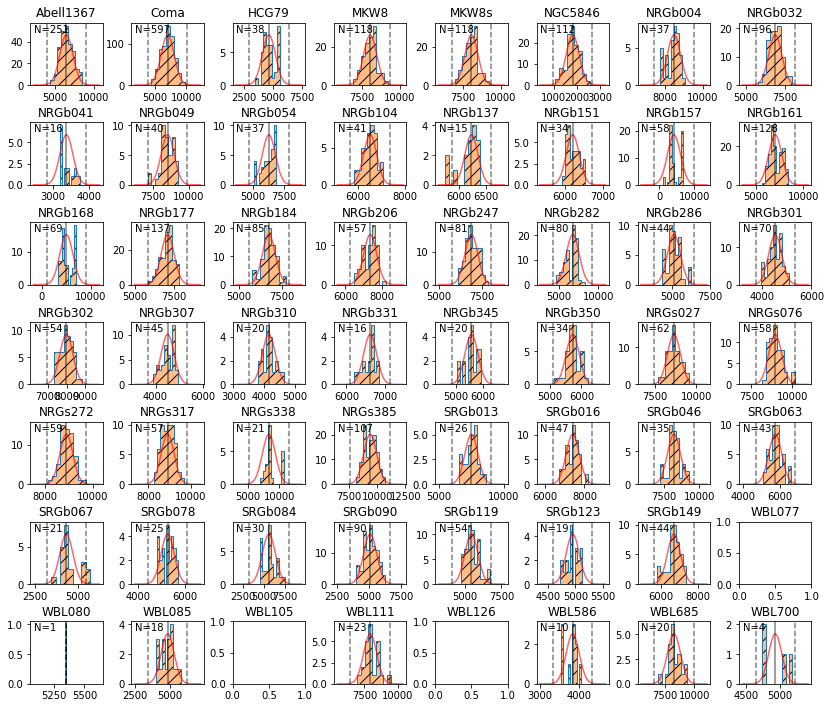

In [202]:
%run ~/github/uatgroups/python/get_biweight_center_scale.py

Abell1367:N=246,vr=6459+ 42- 45, sigma= 834+ 43- 39
Coma     :N=584,vr=6987+ 42- 27, sigma=1042+ 23- 26
HCG79    :N= 45,vr=4657+115-106, sigma= 553+ 51- 76
MKW8     :N=139,vr=8126+ 35- 38, sigma= 446+ 38- 24
MKW8s    :N=139,vr=8115+ 47- 32, sigma= 450+ 34- 31
[1553 2093 1807 1613 1567 1589 1670 2158 1830 1767 1703 1849 2107 1941
 1884 1971 1890 1930 2369 1494 1545 1804 1793 1469 1353 1901 1819 1961
 1501 1501 1266 1900 2203 2380 1750 1756 1950 1963 2165 1375 2299 2167
 1245 1531 1647 1974 1768 2002 1570 1616 1656 1845 1911 1657 1700 1815
 2184 1973 1963 2391 1363 1211 1707 2296  948 2133 1727 1291 1456 1672
 2222 1829 2201 1709 1514 2071 1269 1695 2272 1307 2815 2047 2527 1601
 1930 1737 2099 1070 1837 1652 2161 1604 2088 1691 2049 2011 1829 1643
 1669 1739 1850 2110 1721 2153 1573 1675 1921 2023 1958 1693 1843 1883
 1770 1849 1585 1461 1900 1495 1883]
NGC5846  :N=119,vr=1810+ 24- 38, sigma= 289+ 21- 20
NRGb004  :N= 41,vr=8503+ 85- 77, sigma= 360+ 45- 68
NRGb032  :N=105,vr=6879+ 60- 39

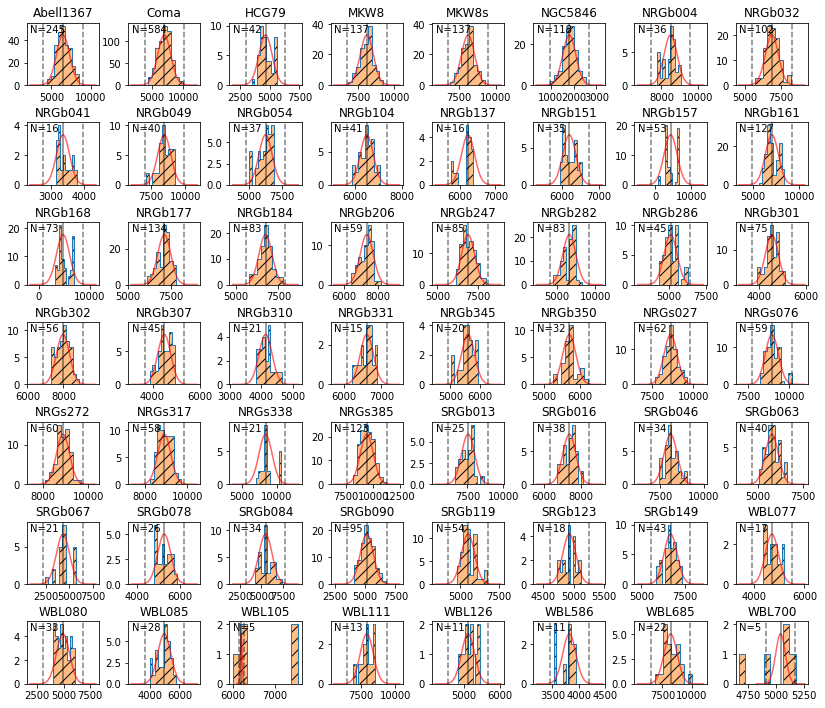

In [194]:
%run ~/github/uatgroups/python/get_biweight_center_scale.py --agc

In [151]:
!pwd

/home/rfinn/research/HalphaGroups/catalogs


In [203]:
atab = Table.read('uat_groups_center_scale_agc.fits')
ntab = Table.read('uat_groups_center_scale_nsa.fits')

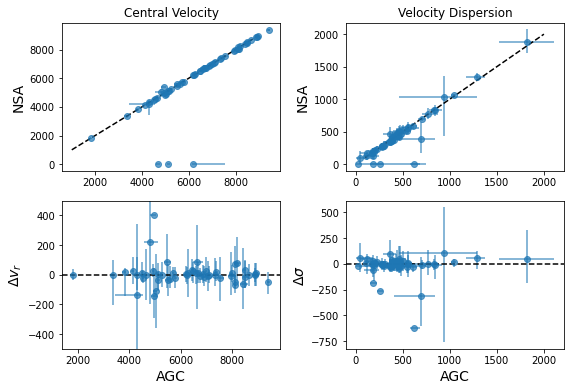

In [204]:
plt.figure(figsize=(9,6))
plt.subplots_adjust(wspace=.3)
plt.subplot(2,2,1)

x = atab['biweight_center']
xerr = [atab['biweight_center_err_down'],atab['biweight_center_err_up']]

y = ntab['biweight_center'] 
yerr = [ntab['biweight_center_err_down'],ntab['biweight_center_err_up']]
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o',alpha=.7)
#plt.xlabel('AGC',fontsize=14)
plt.ylabel('NSA',fontsize=14)
xline = np.linspace(1000,8800,100)
plt.plot(xline,xline,'k--')
plt.title("Central Velocity")

plt.subplot(2,2,3)
y = ntab['biweight_center'] - x
yerr = np.array([ntab['biweight_center_err_down'],ntab['biweight_center_err_up']])
yerr = np.sqrt(2)*yerr

plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o',alpha=.7)
plt.xlabel('AGC',fontsize=14)
plt.ylabel('$\Delta v_r$',fontsize=14)
plt.axhline(ls='--',c='k')
plt.ylim(-500,500)



plt.subplot(2,2,2)
x = atab['biweight_sigma']
xerr = [atab['biweight_sigma_err_down'],atab['biweight_sigma_err_up']]

y = ntab['biweight_sigma']
yerr = [ntab['biweight_sigma_err_down'],ntab['biweight_sigma_err_up']]
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o',alpha=.7)
#plt.xlabel('AGC',fontsize=14)
plt.ylabel('NSA',fontsize=14)
xline = np.linspace(100,2000,100)
plt.plot(xline,xline,'k--')
#plt.gca().set_yscale('log')
#plt.gca().set_xscale('log')
plt.title("Velocity Dispersion")

plt.subplot(2,2,4)

y = ntab['biweight_sigma']-x
yerr = np.sqrt(2)*np.array([ntab['biweight_sigma_err_down'],ntab['biweight_sigma_err_up']])
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='o',alpha=.7)
plt.xlabel('AGC',fontsize=14)
plt.ylabel('$\Delta \sigma $',fontsize=14)
plt.axhline(ls='--',c='k')


In [205]:
atab

Group,vr_ref,RA,DEC,ngal,biweight_center,biweight_center_err_down,biweight_center_err_up,biweight_sigma,biweight_sigma_err_down,biweight_sigma_err_up
bytes9,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64
Abell1367,6600.0,176.152083,19.758889,246,6459.142231421022,45.385905773151535,41.50109744720885,834.31844448815,39.04177010010244,42.56755133333968
Coma,6930.0,194.953054,27.980694,584,6987.34859812954,26.571605024024393,41.75425744255517,1041.91966664564,26.442810790154226,23.289866625701052
HCG79,4350.0,239.799454,20.758555,45,4657.473569993335,105.53422131702519,114.91218458205549,552.8308835356756,75.8453411939193,50.633205205654576
MKW8,8100.0,220.159167,3.476389,139,8126.460345041765,38.05985802393934,34.875080073946265,445.91308001928985,23.866753690110784,37.97675500438527
MKW8s,8100.0,220.159167,3.476389,139,8114.695895624979,31.950848059524105,46.78273346907463,450.06996934865435,31.287692319070743,34.46385034968125
NGC5846,1713.0,226.622017,1.605625,119,1810.4568371856183,38.49314366240287,23.567617831991583,289.3902353347895,19.535928829295187,20.639202961354215
NRGb004,8343.0,129.547917,25.116667,41,8503.21630030789,76.78918103007345,84.9945465193232,360.2944570287699,68.20918998306536,44.69487050546013
NRGb032,7473.000000000001,139.95,33.758889,105,6879.04981984275,39.098521816038556,59.58688375488873,460.57464070462674,35.696266004547,34.87683192718737
NRGb041,3615.9999999999995,141.300833,11.280278,21,3372.9911263951335,120.38386664504287,56.43214327454098,197.27489787082703,45.54721522953756,31.361437622875485


rms for AGC = 231.4
rms for NSA = 235.8


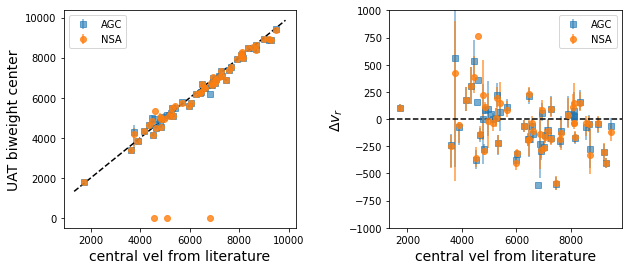

In [234]:
# plot recession velocity from the our vr vs. literature

plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=.4)
plt.subplot(1,2,1)
yerr = [ntab['biweight_center_err_down'],ntab['biweight_center_err_up']]
plt.errorbar(atab['vr_ref'],atab['biweight_center'],yerr=yerr,label='AGC',fmt='bs',color=mycolors[0],alpha=.6)


yerr = np.array([ntab['biweight_center_err_down'],ntab['biweight_center_err_up']])
plt.errorbar(ntab['vr_ref'],ntab['biweight_center'],yerr=yerr,label='NSA',fmt='bo',color=mycolors[1],alpha=.8)
plt.legend()
plt.xlabel("central vel from literature",fontsize=14)
plt.ylabel("UAT biweight center",fontsize=14)
xmin,xmax = plt.xlim()
xline = np.linspace(xmin,xmax,100)
plt.plot(xline,xline,'k--')


plt.subplot(1,2,2)
yerr = np.sqrt(2)*np.array([ntab['biweight_center_err_down'],ntab['biweight_center_err_up']])
plt.errorbar(atab['vr_ref'],atab['biweight_center']-atab['vr_ref'],yerr=yerr,label='AGC',fmt='bs',color=mycolors[0],alpha=.6)


yerr = np.sqrt(2)*np.array([ntab['biweight_center_err_down'],ntab['biweight_center_err_up']])
plt.errorbar(ntab['vr_ref'],ntab['biweight_center']-ntab['vr_ref'],yerr=yerr,label='NSA',fmt='bo',color=mycolors[1],alpha=.8)
plt.legend()
plt.xlabel("central vel from literature",fontsize=14)
plt.ylabel("$\Delta v_r$",fontsize=14)
xmin,xmax = plt.xlim()



plt.axhline(ls='--',c='k')
plt.ylim(-1000,1000)


delta = atab['biweight_center']-atab['vr_ref']
print(f"rms for AGC = {np.std(delta):.1f}")


delta = ntab['biweight_center']-ntab['vr_ref']
flag = ntab['biweight_center'] > 0

print(f"rms for NSA = {np.std(delta[flag]):.1f}")


In [201]:
ntab

Group,vr_ref,RA,DEC,ngal,biweight_center,biweight_center_err_down,biweight_center_err_up,biweight_sigma,biweight_sigma_err_down,biweight_sigma_err_up
bytes9,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64
Abell1367,252,6600.0,176.152083,19.758889,6470.218681550428,48.80265091493857,52.92858386068929,838.6646843457152,31.453058036747507,44.078373380879725
Coma,597,6930.0,194.953054,27.980694,7026.413696408181,62.80080847450063,37.144703000776644,1047.440874094978,18.7618600717733,33.00342699621365
HCG79,39,4350.0,239.799454,20.758555,4674.2056184592875,146.05202026090592,126.81510570049431,572.8324438456517,72.8188895363864,51.26595304009254
MKW8,121,8100.0,220.159167,3.476389,8063.981548761407,35.9851837758124,38.647709805864,437.1743378224538,31.211236962418752,31.078752094956997
MKW8s,121,8100.0,220.159167,3.476389,8061.575387058629,41.12012392731231,38.8877259369965,427.3968165287349,33.68205593275303,29.058172523563826
NGC5846,113,1713.0,226.622017,1.605625,1814.2580129823243,31.08073355751526,29.88411347307624,287.48374252658857,22.332737235395314,26.870922150202603
NRGb004,39,8343.0,129.547917,25.116667,8469.945084354422,69.2070607654914,93.3744179694695,351.6094972344681,50.594933062184055,39.75376315358932
NRGb032,100,7473.000000000001,139.95,33.758889,6864.816355664547,44.50368792548943,45.06550128245908,418.49138040488583,35.1434526279279,32.06811142143124
NRGb041,20,3615.9999999999995,141.300833,11.280278,3357.705204632688,134.72964546539697,85.00288885850887,183.5465634423553,133.61615995159798,35.99127748256649
